In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [13]:
(X_train, y_train ), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
X_scaled = X_train.reshape(-1, 28, 28, 1) / 255.0

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_scaled, val_scaled, y_train, val_target = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [20]:
model = Sequential()

In [21]:
from tensorflow.keras.layers import Conv2D

In [22]:
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(2))

c:\ProgramData\anaconda3\envs\prac_mldl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint('./best-cnn-model.keras', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_scaled, y_train, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7396 - loss: 0.7299 - val_accuracy: 0.8798 - val_loss: 0.3296
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8689 - loss: 0.3637 - val_accuracy: 0.8973 - val_loss: 0.2807
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8901 - loss: 0.3098 - val_accuracy: 0.9052 - val_loss: 0.2581
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9008 - loss: 0.2724 - val_accuracy: 0.9101 - val_loss: 0.2404
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9122 - loss: 0.2403 - val_accuracy: 0.9127 - val_loss: 0.2316
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9218 - loss: 0.2181 - val_accuracy: 0.9150 - val_loss: 0.2318
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9237 - loss: 0.2047 - val_accuracy: 0.9190 - val_loss: 0.2210
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9303 - loss: 0.188

In [33]:
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

0.9349166750907898
0.9190000295639038
0.17634649574756622
0.22358635067939758


In [28]:
import matplotlib.pyplot as plt

In [29]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [31]:
import numpy as np

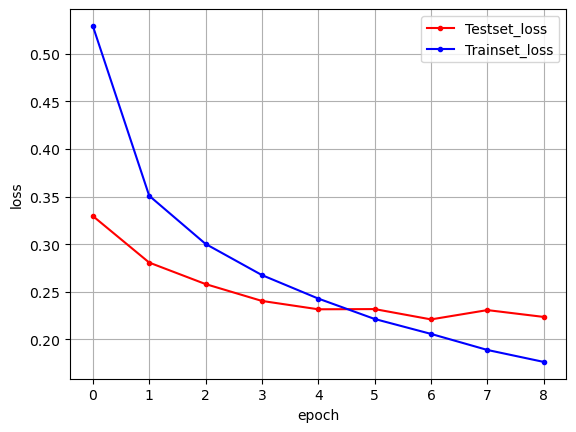

In [32]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [34]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2125


[0.220987468957901, 0.9190000295639038]

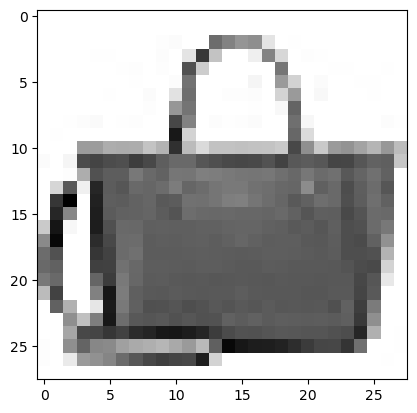

In [36]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [44]:
preds = model.predict(val_scaled[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[array([2.6145853e-15, 9.5880811e-23, 1.4605775e-19, 5.1373189e-16,
        4.9161442e-17, 3.4209189e-13, 7.3711470e-16, 6.9954342e-18,
        1.0000000e+00, 8.2125138e-16], dtype=float32)]

In [45]:
list(preds)

[array([2.6145853e-15, 9.5880811e-23, 1.4605775e-19, 5.1373189e-16,
        4.9161442e-17, 3.4209189e-13, 7.3711470e-16, 6.9954342e-18,
        1.0000000e+00, 8.2125138e-16], dtype=float32)]

In [54]:
for i in preds[0]:
    print(f"{i:.15f}")

0.000000000000003
0.000000000000000
0.000000000000000
0.000000000000001
0.000000000000000
0.000000000000342
0.000000000000001
0.000000000000000
1.000000000000000
0.000000000000001
